# Modelo de Máquinas de Vector Soporte

In [2]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("U.S. Colleges.dat", sep="\t")
print(df)


         ID  GRADRAT    CSAT  MATRICULADOS  PUBLICO  STUAULA  GASTO   ACT
0      1002     40.0     NaN      6.891626        1     14.3   2.55  17.0
1      1003     55.0     NaN      5.187386        0     32.8   3.25  20.0
2      1004     51.0     NaN      6.345636        1     18.9    NaN  21.0
3      1005     15.0     NaN      7.153052        1     18.7    NaN   NaN
4      1009     69.0  1076.0      8.029433        1     16.7    NaN  24.0
...     ...      ...     ...           ...      ...      ...    ...   ...
1297  29099     64.0   850.0      6.113682        0     15.4    NaN   NaN
1298  29100      NaN     NaN      7.448334        1     11.7    NaN   NaN
1299  29258     55.0  1005.0      5.955837        0     16.1   5.00  23.0
1300  29261     58.0  1136.0      3.931826        0      9.3    NaN  23.0
1301  30431     60.0  1066.0      3.091042        0     11.8    NaN  25.0

[1302 rows x 8 columns]


In [4]:
df=df.dropna()
print(df)

         ID  GRADRAT    CSAT  MATRICULADOS  PUBLICO  STUAULA  GASTO   ACT
5      1012     72.0  1100.0      5.659482        0     14.0  4.480  26.0
7      1019     44.0   959.0      4.844187        0     11.4  3.920  23.0
15     1041     70.0   990.0      5.438079        0     14.4  4.788  24.0
18     1047     48.0   980.0      6.714171        1     23.0  2.570  20.0
22     1055     38.0  1010.0      6.098074        1     12.7  3.500  24.0
...     ...      ...     ...           ...      ...      ...    ...   ...
1257   9265     42.0  1040.0      7.383989        1     17.0  2.744  23.0
1279  10311     73.0  1020.0      6.692084        0     17.7  3.528  24.0
1281  10366     69.0  1069.0      8.762802        1     23.1  3.412  25.0
1296  29059     55.0   905.0      4.969813        0     13.1  4.440  22.0
1299  29258     55.0  1005.0      5.955837        0     16.1  5.000  23.0

[297 rows x 8 columns]


Queremos clasificar a diferentes centros en centro Público (1) y centro Privado (0) en función del número de matriculados y la ratio estudiante/aula. Nuestra hipótesis es que el modelo clasificará como centro publico aquellos casos donde haya más estudiantes matriculados y más estudiantes/aula, con lo cual, por encima del hiperplano quedarán los casos del centro público y por debajo los del centro privado.

In [5]:
print(set(df['PUBLICO']))

{0, 1}


In [6]:
#x=variables numericas
x=df[['MATRICULADOS', 'STUAULA']]
y=df['PUBLICO']

print(x)
print(y)

      MATRICULADOS  STUAULA
5         5.659482     14.0
7         4.844187     11.4
15        5.438079     14.4
18        6.714171     23.0
22        6.098074     12.7
...            ...      ...
1257      7.383989     17.0
1279      6.692084     17.7
1281      8.762802     23.1
1296      4.969813     13.1
1299      5.955837     16.1

[297 rows x 2 columns]
5       0
7       0
15      0
18      1
22      1
       ..
1257    1
1279    0
1281    1
1296    0
1299    0
Name: PUBLICO, Length: 297, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100) #por defecto

print(x_train) #por defecto: 75% de los datos para el entrenamiento y el 25% test

print(x_test)

print(y_train)


      MATRICULADOS  STUAULA
802       6.495266     17.6
1015      6.115892     18.5
989       6.645091     12.8
1071      5.327876     12.1
152       7.418181      7.5
...            ...      ...
299       5.942799     13.6
241       5.655992     12.7
360       5.730100     13.1
1188      5.298317     15.9
39        5.613128     13.1

[222 rows x 2 columns]
      MATRICULADOS  STUAULA
969       4.477337     15.2
705       5.075174     11.6
982       5.036953     11.4
803       5.342334     13.3
1008      6.415097     16.2
...            ...      ...
872       7.400621     13.9
154       4.605170      8.3
844       6.543912     13.3
1047      5.955837     11.4
748       7.554859     18.3

[75 rows x 2 columns]
802     0
1015    0
989     1
1071    0
152     0
       ..
299     0
241     0
360     0
1188    0
39      0
Name: PUBLICO, Length: 222, dtype: int64


In [8]:
clf = SVC(kernel='linear') 
clf.fit(x_train, y_train)
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
print(w)
print(b)

[1.40707556 0.20816288]
-12.99953817636577


In [9]:
x_visual = np.linspace(2,10)  #eje x del grafico posterior
print(x_visual)

[ 2.          2.16326531  2.32653061  2.48979592  2.65306122  2.81632653
  2.97959184  3.14285714  3.30612245  3.46938776  3.63265306  3.79591837
  3.95918367  4.12244898  4.28571429  4.44897959  4.6122449   4.7755102
  4.93877551  5.10204082  5.26530612  5.42857143  5.59183673  5.75510204
  5.91836735  6.08163265  6.24489796  6.40816327  6.57142857  6.73469388
  6.89795918  7.06122449  7.2244898   7.3877551   7.55102041  7.71428571
  7.87755102  8.04081633  8.20408163  8.36734694  8.53061224  8.69387755
  8.85714286  9.02040816  9.18367347  9.34693878  9.51020408  9.67346939
  9.83673469 10.        ]


In [10]:
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]
print(y_visual)

[48.92989108 47.82630037 46.72270966 45.61911895 44.51552824 43.41193752
 42.30834681 41.2047561  40.10116539 38.99757468 37.89398396 36.79039325
 35.68680254 34.58321183 33.47962112 32.3760304  31.27243969 30.16884898
 29.06525827 27.96166756 26.85807685 25.75448613 24.65089542 23.54730471
 22.443714   21.34012329 20.23653257 19.13294186 18.02935115 16.92576044
 15.82216973 14.71857901 13.6149883  12.51139759 11.40780688 10.30421617
  9.20062545  8.09703474  6.99344403  5.88985332  4.78626261  3.68267189
  2.57908118  1.47549047  0.37189976 -0.73169095 -1.83528166 -2.93887238
 -4.04246309 -5.1460538 ]


Axes(0.125,0.11;0.775x0.77)


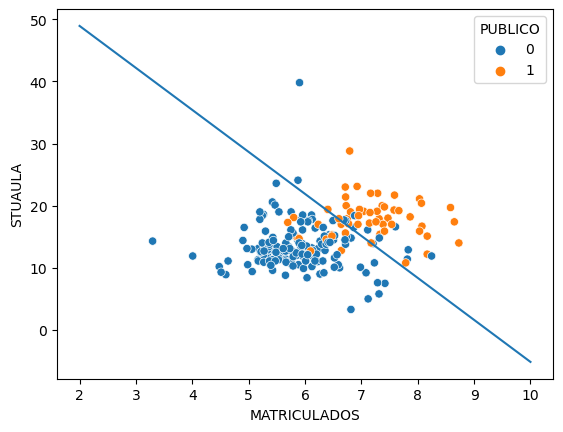

In [11]:
print(scatterplot(data = x_train, x='MATRICULADOS', y='STUAULA', hue=y_train))

plt.plot(x_visual,y_visual)
plt.show()

#con datos train

Como pordemos ver en el gráfico el hiperplano clasifica bien a pesar de unos pocos casos. Como imaginabamos, los casos que pertenecen al centro publico quedan por encima del hiperplano y los que pertenecen al centro privado quedan por debajo. Se confirma nuestra hipótesis pero antes aseguremonos de que nuestro modelo de MVS tiene un buen ajuste, porque podría no haber encontrado el mejor de los hiperplanos.

In [12]:
#con datos test

predictions = clf.predict(x_test)
print(predictions[:10]) #10 primeras predicciones

#ajuste
print(accuracy_score(y_test, predictions)) 

plt.show()


[0 0 0 0 0 0 1 0 0 0]
0.9333333333333333


Hemos predicho los 10 primeros casos y el resultado es que 9/10 los predice como pertenecientes al centro publico y solo uno al centro privado.

Por último, obtenemos un ajuste de 0.93 (casi 1), es un ajuste muy bueno con lo cual, este modelo de MVS clasifica muy bien a los centros en centros publicos/privados en función al numero de estudiantes matriculados y a la ratio estudiante/aula.